<a href="https://colab.research.google.com/github/raafiputri/Tugas-EDA-Kelompok-B/blob/main/KELOMPOK_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
KELOMPOK B

Ghefira Nur Fatimah Widyasari - 2006483694
Raafi Putri Ramadhani Salamah - 2006570952
Andini Assyahidah             - 2006571040
Daranita Sukmajati            - 2006570946
Kezia Emmanuela Bangun        - 2006572964

### **TUGAS  1**

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

In [ ]:
#Importing CSV Data

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
price = pd.read_csv('data/price.csv')

--2021-04-14 04:20:43--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53592 (52K) [text/plain]
Saving to: ‘data/price.csv’

price.csv           100%[===================>]  52.34K  --.-KB/s    in 0.007s  

2021-04-14 04:20:43 (7.31 MB/s) - ‘data/price.csv’ saved [53592/53592]



In [ ]:
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


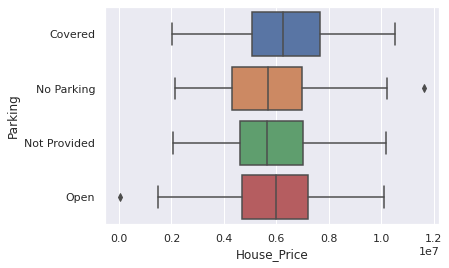

In [ ]:
# BoxPlots
p = sns.boxplot(x="House_Price", y="Parking", data=price2)

In [ ]:
#TUGAS 01 KELOMPOK B
#Mengeluarkan outlier atas

q1 = price2['House_Price'].quantile(0.25)    #untuk mendapatkan kuartil bawah dari data
q3 = price2['House_Price'].quantile(0.75)    #untuk mendapatkan kuartil atas dari data
IQR = q3 - q1                                #meng-eliminasi kuartil atas dengan kuartil bawah sehingga di dapat interquartile range (IQR)

outlier_atas = price2['House_Price']>q3+(1.5)*IQR    #untuk mendapatkan outlier atas, pada boxplot dapat kita lihat bahwa outlier berada pada angka yang lebih besar dari q3 + (1.5)*IQR
data_outlier_atas = price2.loc[outlier_atas]         #untuk mengeluarkan outlier atas dari data dan di simpan dalam variabel data_outlier_atas
data_outlier_atas                                    #untuk menampilkan data outlier yang dikeluarkan

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000


### **TUGAS 2**

In [ ]:
#TUGAS 02 KELOMPOK B
#Mengeluarkan outlier bawah


In [ ]:
try:
    # Running Locally 
    df = pd.read_csv('data/price.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
    df = pd.read_csv('data/price.csv')

In [ ]:
df #menampilkan data dalam bentuk tabel

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


In [ ]:
Q1 = df['House_Price'].quantile(0.25) #menghitung kuartil bawah dari data
Q3 = df['House_Price'].quantile(0.75) #menghitung kuartil atas dari data
IQR = Q3 - Q1                         #meng-eliminasi kuartil atas dengan kuartil bawah sehingga di dapat interquartile range (IQR)

print("Q1 = {}, Q3 = {}, IQR = {}".format(Q1, Q3, IQR)) #menampilkan kuartil bawah, kuartil atas, dan nilai interquartile range

Q1 = 4661000.0, Q3 = 7187250.0, IQR = 2526250.0


In [ ]:
 #mencari range, apabila di luar dari range maka itu adalah outliers
 Lower_bound = Q1 - 1.5*IQR
 Upper_bound = Q3 + 1.5*IQR
 print("Lower_bound = {}, Upper_bound = {}".format(Lower_bound, Upper_bound))

Lower_bound = 871625.0, Upper_bound = 10976625.0


In [ ]:
 #mendeteksi outliers_ = df[(df.House_Price<Lower_limit)|(df.House_Price>Upper_limit)]
 outliers_ =  df[(df.House_Price<Lower_bound)|(df.House_Price>Upper_bound)]
 outliers_

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
360,361,20662.0,20945.0,23294.0,24300.0,12730.0,Covered,CAT B,1130,150000000
678,679,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000
811,812,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


In [ ]:
# membuang semua outliers yang ada pada data
df_tanpa_outliers = df[(df.House_Price>Lower_bound)&(df.House_Price<Upper_bound)]
df_tanpa_outliers

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


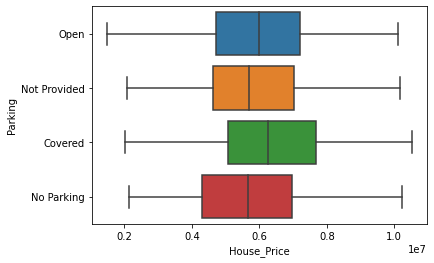

In [ ]:
#boxplot tanpa outliers
p = sns.boxplot(x="House_Price", y="Parking", data= df_tanpa_outliers) 

In [ ]:
#Tugas 02
#mengeluarkan outliers bawah
df_tanpa_outliers_bawah = df[(df.House_Price>Lower_bound)]
df_tanpa_outliers_bawah

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


## **Boxplot Tanpa Outlier Bawah**





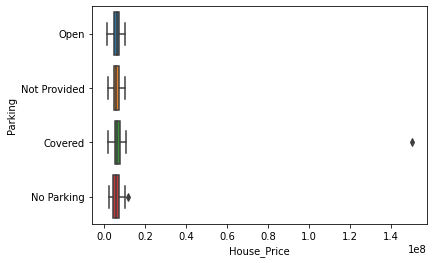

In [ ]:
#boxplot tanpa outliers bawah
p = sns.boxplot(x="House_Price", y="Parking", data= df_tanpa_outliers_bawah) 

In [ ]:
#Importing CSV Data

!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
price = pd.read_csv('data/price.csv')

mkdir: cannot create directory ‘data’: File exists
--2021-04-13 10:31:40--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53592 (52K) [text/plain]
Saving to: ‘data/price.csv.1’

price.csv.1         100%[===================>]  52.34K  --.-KB/s    in 0.007s  

2021-04-13 10:31:40 (7.35 MB/s) - ‘data/price.csv.1’ saved [53592/53592]



In [ ]:
price.drop("Observation", axis=1, inplace=True)
price.drop_duplicates(inplace=True)
price['Parking'] = price['Parking'].astype('category')
price['City_Category'] = price['City_Category'].astype('category')
price2 = price[np.abs(price.House_Price - price.House_Price.mean())<=(2*price.House_Price.std())]
price2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      918 non-null    float64 
 1   Dist_Market    918 non-null    float64 
 2   Dist_Hospital  930 non-null    float64 
 3   Carpet         923 non-null    float64 
 4   Builtup        916 non-null    float64 
 5   Parking        931 non-null    category
 6   City_Category  931 non-null    category
 7   Rainfall       931 non-null    int64   
 8   House_Price    931 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 60.3 KB


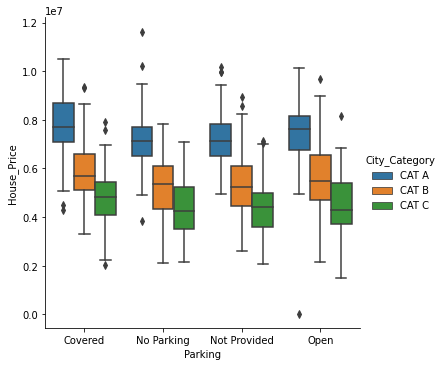

In [ ]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2)

In [ ]:
q1 = price2['House_Price'].quantile(0.25) #menghitung kuartil bawah dari data
q3 = price2['House_Price'].quantile(0.75) #menghitung kuartil atas dari data
IQR = q3 - q1                             #meng-eliminasi kuartil atas dengan kuartil bawah sehingga di dapat interquartile range (IQR)

print("q1 = {}, q3 = {}, IQR = {}".format(q1, q3, IQR)) #menampilkan kuartil bawah, kuartil atas, dan nilai interquartile range

q1 = 4658000.0, q3 = 7180500.0, IQR = 2522500.0


In [ ]:
#mencari range, apabila di luar dari range maka itu adalah outliers
Lower_limit = q1 - 1.5*IQR #batas bawah
Upper_limit = q3 + 1.5*IQR #batas atas
print("Lower_limit = {}, Upper_limit = {}".format(Lower_limit, Upper_limit)) #menampilkan batas atas dan batas bawah

Lower_limit = 874250.0, Upper_limit = 10964250.0


In [ ]:
#mendeteksi outliers_ = price2[(price2.House_Price<Lower_limit)|(price2.House_Price>Upper_limit)]
outliers_ = price2[(price2.House_Price<Lower_limit)|(price2.House_Price>Upper_limit)]
outliers_

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
678,7288.0,9560.0,12531.0,1989.0,2414.0,No Parking,CAT A,860,11632000
811,NaN,NaN,NaN,NaN,NaN,Open,CAT A,440,30000


In [ ]:
#Tugas 02
#mengeluarkan outliers bawah
price2_tanpa_outliers_bawah = price2[(price2.House_Price>Lower_limit)]
price2_tanpa_outliers_bawah

,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...
927,12176.0,8518.0,15673.0,1582.0,1910.0,Covered,CAT C,1080,6639000
928,7214.0,8717.0,10553.0,1387.0,1663.0,Open,CAT A,850,8208000
929,7423.0,11708.0,13220.0,1200.0,1436.0,Open,CAT A,1060,7644000
930,15082.0,14700.0,19617.0,1299.0,1560.0,Open,CAT B,770,9661000


### **Boxplot Tanpa Outlier Bawah**

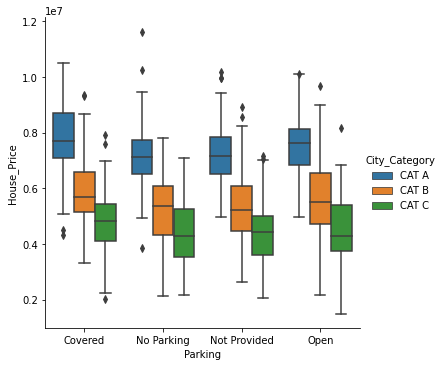

In [ ]:
p = sns.catplot(x="Parking", y="House_Price", hue="City_Category", kind="box", data=price2_tanpa_outliers_bawah)

## **TUGAS 3**

In [ ]:
import seaborn as sns
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.head()

baris =  244 , Kolom =  7


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244,NaN,NaN,NaN,19.7859,8.90241,3.07,13.3475,17.795,24.1275,50.81
tip,244,NaN,NaN,NaN,2.99828,1.38364,1,2,2.9,3.5625,10
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244,NaN,NaN,NaN,2.56967,0.9511,1,2,2,3,6


# 1. Adakah tipe variabel yang kurang tepat di data tersebut?

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


Diketahui bahwa tipe variabel di atas sudah sesuai

# 2. Apakah data numeriknya cenderung berdistribusi normal?

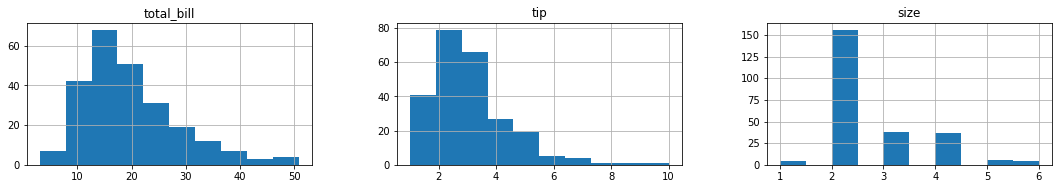

In [ ]:
numerical = tips.select_dtypes(include = ['int64','float64']).columns

tips[numerical].hist(figsize=(25, 6), layout=(2, 4));

Dilihat dari histogram, kita dapat mengetahui bahwa data numeriknya tidak berdistibusi normal dikarenakan:
1. Kurvanya tidak berbentuk lonceng
2. Rata-rata tidak terletak di tengah distribusi
3. Luas daerah sebelah kiri dan kanan tidak mendekati 50%

# 3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?

In [ ]:
#mengecek apakah ada duplikat data?
print(tips.shape)
tips.duplicated().sum()

(244, 7)


1

Terdapat 1 duplikasi data

In [ ]:
#menghapus entri yang memiliki data duplikat 
tips.drop_duplicates(inplace=True)
print(tips.duplicated().sum()) # tidak ada lagi duplikat
print(tips.shape) # mengecek ulang dengan print size data

0
(243, 7)


In [ ]:
# Melihat Missing Values
print(tips.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


Tidak terdapat Missing Values

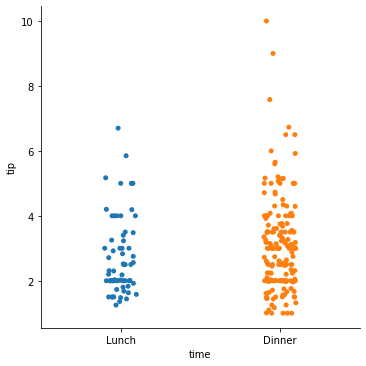

In [ ]:
# Mengecek adakah outlier?
p= sns.catplot(x="time", y="tip", data=tips)

Dari sampel yang telah diambil yaitu data waktu terhadap tip (Kategorik dan numerik) dapat dilihat pada bagian Dinner dengan Tip antara 8-10 terdapat titik yang renggang atau tidak mengelompok dengan data lainnya. Hal ini mengindikasikan terdapat outlier karena data tersebut memiliki karakteristik secara signifikan berbeda dengan kebanyakan data lainnya.

# 4. Apakah pelanggan pria dan wanita cenderung proporsional (balance)?

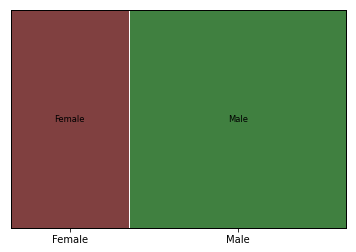

In [ ]:
# Mosaic Plot
from statsmodels.graphics.mosaicplot import mosaic

p = mosaic(tips, ['sex'])

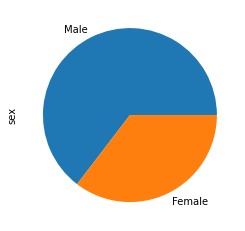

In [ ]:
# PieChart
plot = tips.sex.value_counts().plot(kind='pie')

Dari kedua visualisasi ini dapat diketahui bahwa pelanggan pria lebih banyak dibandingkan pelanggan wanita

# 5. Dari data yang ada apakah Pria atau wanita ada kecenderungan memberi tips lebih besar?






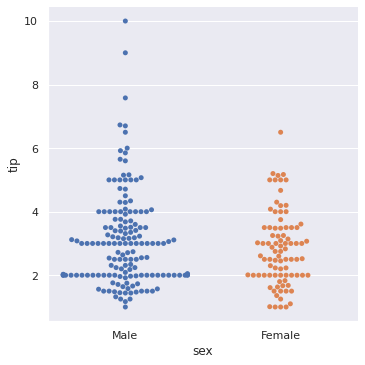

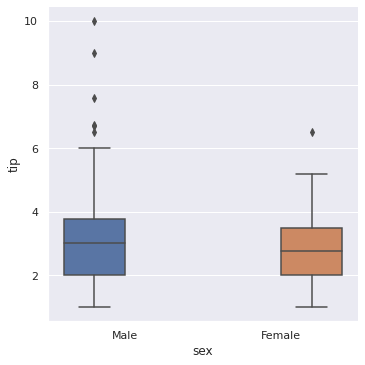

In [ ]:
p= sns.catplot(x="sex", y="tip", data=tips, kind ='swarm')
p2 = sns.catplot(x="sex", y="tip", hue="sex", kind="box", data=tips)

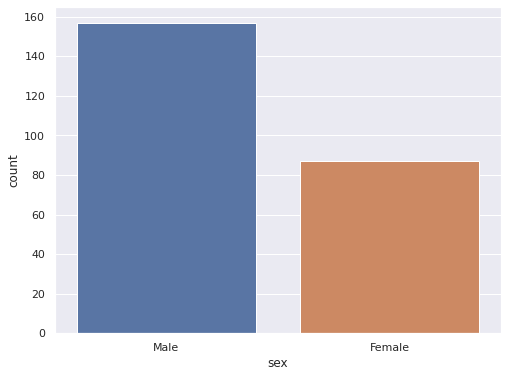

In [ ]:
plt.figure(figsize=(8,6))
p = sns.countplot(x="sex", data= tips)

Dengan demikian, dari data tersebut terlihat kecenderungan bahwa Laki-laki dengan variabel Male lebih memberikan tips lebih

# 6. Dari data yang ada apakah ada kecenderungan tips lebih besar di hari-hari tertentu?

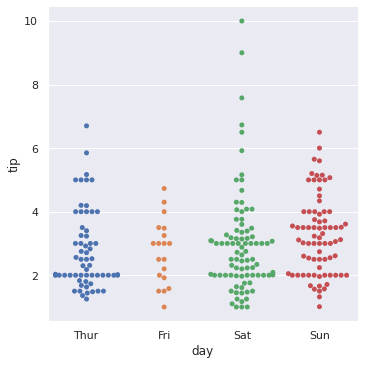

In [ ]:
p= sns.catplot(x="day", y="tip", data=tips, kind ='swarm')



Terlihat dari visualisasi di atas, pada hari sabtu customer memiliki kecenderungan untuk memberikan tips lebih besar 

# 7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih 

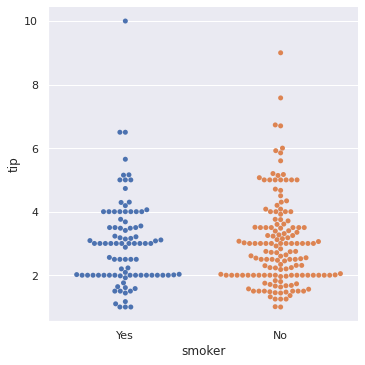

In [ ]:
p= sns.catplot(x="smoker", y="tip", data=tips, kind ='swarm')

In [ ]:

Dengan demikian, pada visualisasi di atas terlihat bahwa yang memberi tips lebih banyak adalah orang yang tidak merokok

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("tips.csv")

In [ ]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['sex'] = df['sex'].replace({'Female': 0, 'Male': 1})
    df['smoker'] = df['smoker'].replace({'No': 0, 'Yes': 1})
    df['time'] = df['time'].replace({'Lunch': 0, 'Dinner': 1})
    
    df['day'] = df['day'].replace({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
    
    return df

In [ ]:
datatips = preprocess_inputs(data)

In [ ]:
datatips

# 8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?

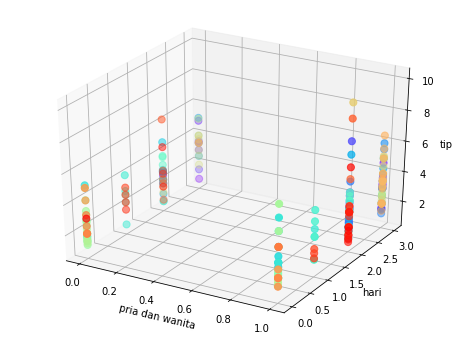

In [ ]:
import matplotlib.cm as cm
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x = datatips['sex']
y = datatips['day']
z = datatips['tip']
color = cm.rainbow(np.linspace(0, 1, len(y)))

ax.scatter(x, y, z, s=50, c=color, marker='o')
ax.set_xlabel('pria dan wanita')
ax.set_ylabel('hari')
ax.set_zlabel('tip')
plt.show()

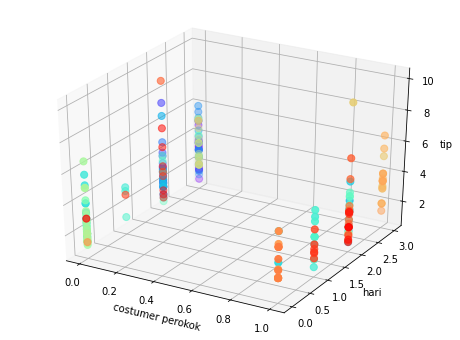

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
x = datatips['smoker']
y = datatips['day']
z = datatips['tip']
color = cm.rainbow(np.linspace(0, 1, len(y)))

ax.scatter(x, y, z, s=50, c=color, marker='o')
ax.set_xlabel('costumer perokok')
ax.set_ylabel('hari')
ax.set_zlabel('tip')
plt.show()

- Dari bentuk scatter plot 3D pertama, yaitu antara x=pengunjung pria dan wanita, y=hari, dan z=tip yang merupakan pertambahan dari no 5
- Dari bentuk scatter plot 3D kedua, yaitu antara x=pengunjung yang perokok, y=hari, dan z=tip yang merupakan pertambahan dari no 7

Sehingga dari scatter plot pertama dan kedua dapat dilihat dan disimpulkan bahwa pola no 5 dan 7 juga dipengaruhi hari

# 9. Pola apalagi yang dapat anda temukan? (misal, bisakah anda menyarankan tata letak kursi/meja restaurant dari data ini?)

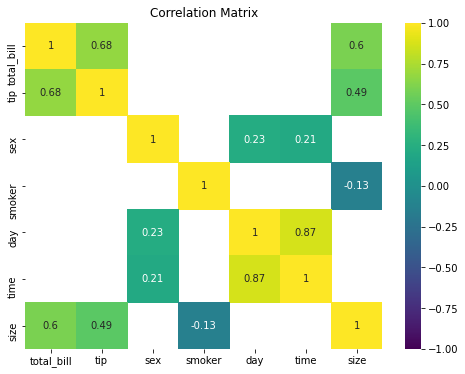

In [ ]:
import seaborn as sns
corr2 = datatips.corr() 
plt.figure(figsize=(8, 6))
sns.heatmap(corr2[(corr2 >= 0.2) | (corr2 <= -0.1)], annot=True, vmin=-1.0, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244,NaN,NaN,NaN,19.7859,8.90241,3.07,13.3475,17.795,24.1275,50.81
tip,244,NaN,NaN,NaN,2.99828,1.38364,1,2,2.9,3.5625,10
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244,NaN,NaN,NaN,2.56967,0.9511,1,2,2,3,6


Dari bagan-bagan data yang ada tersebut dapat dilihat bahwa masing-masing dataset dapat membentuk pola, misalnya
- Size of the party memiliki korelasi yang besar dengan total bill yang dapat menyarankan pihak restaurant untuk memperluas space dengan menambah kursi/meja kemudian dapat menambah hiburan-hiburan yang menarik bagi pengunjung 
- Pria dan wanita yang berkunjung berdasarkan day dan time membentuk pola yang berpengaruh bagi restaurant, seperti bahwa male, non smoker, saturday, dan dinner merupakan top/paling banyak dari dataset restaurant sehingga dapat dilakukan inovasi oleh pihak restaurant dari informasi tersebut misalnya tata letak meja kursi lebih banyak diruangan non smoking   
- Tip dan size of the party dari restaurant juga saling mempengaruhi, sehingga dapat menyarankan bahwa pelayanan bagi pengunjung harus tetap maksimal meskipun sedang ramai ataupun sepi, serta fasilitas yang ada juga harus tetap dijaga misalnya kebersihan dan keramahan
- Day dan time dari datangnya pengunjung ke restaurant juga membentuk pola dan memiliki interpretasi yang dapat menyarankan pihak restaurant, bahwa saturday night adalah waktu paling ramai untuk didatangi pengunjung sehingga pihak restaurant harus lebih sigap pada waktu-waktu tersebut dalam fasilitas maupun pelayanan
- Bill dan tip juga dapat membentuk pola dan memiliki interpretasi korelasi matriks yang cukup besar 

# 10. Final question: dari hasil EDA anda saran apa saja yang akan anda berikan ke pemilik restaurant?

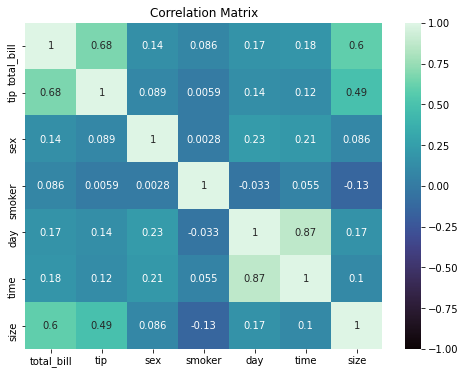

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(datatips.corr(), annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Matrix")
plt.show()

- Dari hasil EDA yang ada, kami menyarankan pemilik resaturant agar dapat menggunakan hasil/data yang ada untuk dapat mengembangkan restaurantnya sebab korelasi/pola yang ada (seperti yang disebutkan pada no 9) sangat berpengaruh bagi bagian-bagian restaurant yang harus dikembangkan dan harus diperbaiki. Dari data-data tersebut dapat menghasilkan interpretasi korelasi matriks antara dataset yang ada menjadi kecil/dibawah 0.4 dan negatif misalnya smoker dan day kemudian smoker dan size dimana hal tersebut dapat dicari tahu lebih dalam oleh pihak/pemilik restaurant mengenai alasan dapat terjadinya hal tersebut sehingga dapat dibenahi.
- Selain itu dari data-data yang telah diolah dapat dilihat bahwa pengunjung laki-laki dan pengunjung non smoker datang paling banyak ke restaurant dan memberi tip paling besar. Kemudian pengunjung juga ramai datang pada hari Sabtu saat dinner. Sehingga pemilik restaurant dapat melakukan inovasi dari informasi-informasi tersebut, seperti meja/kursi di area non smoking lebih banyak dan area non smoking lebih luas daripada area smoking. Pada hari Sabtu malam terutama, pelayan di restaurant harus lebih banyak karena pengunjung lebih ramai. Kemudian karena lebih banyak laki-laki yang berkunjung sehingga dapat dilakukan pencarian informasi dari data tersebut yang dapat menarik pengunjung lebih banyak lagi misalkan dengan mengadakan live band, dll.
- Ada pun dari data tersebut dapat dilakukan juga terobosan inovasi, misalnya diketahui bahwa pengunjung perempuan lebih sedikit, sehingga dapat digali informasi yang dapat menarik pengunjung perempuan juga untuk makan di restoran tersebut, misalnya dengan diadakan promo-promo menarik. 

- # ***Skills/kompetensi apa yang terasa sangat diperlukan dari latihan ini?***

- Mengerti mengenai pandas data frame
- Mengerti mengenai visualisasi yang tepat digunakan berdasarkan data yang diambil 
- Mengerti mengenai cara mendeteksi outliers dari suatu data